In [23]:
import pandas as pd
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
os.chdir('C:\\Users\\zhong\\git\\Bikeshare\\Data')

In [3]:
df = pd.read_csv("hourly.csv")

In [4]:
df.dteday = pd.to_datetime(df.dteday)

## Modify data type for categorical variables

In [5]:
df.season = df.season.astype("category")
df.yr = df.yr.astype("category")
df.mnth = df.mnth.astype("category")
df.hr = df.hr.astype("category")
df.holiday = df.holiday.astype("category")
df.weekday = df.weekday.astype("category")
df.workingday = df.workingday.astype("category")
df.weathersit = df.weathersit.astype("category")

In [6]:
df.isna().sum().sum()

0

No NA

## Data Visualization

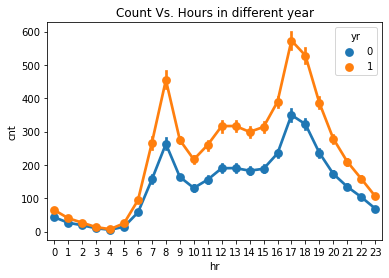

In [7]:
sns.pointplot(x = df.hr,y = df.cnt, hue =df.yr)
plt.title("Count Vs. Hours in different year")
plt.show()

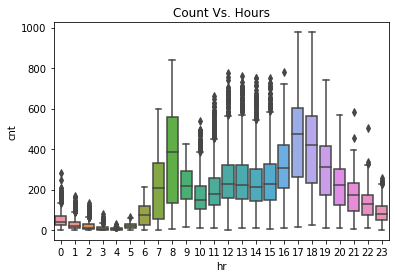

In [8]:
sns.boxplot(y=df.cnt,x=df.hr)
plt.title("Count Vs. Hours")
plt.show()

We can observed the peak hours are at 8 and 17,18.

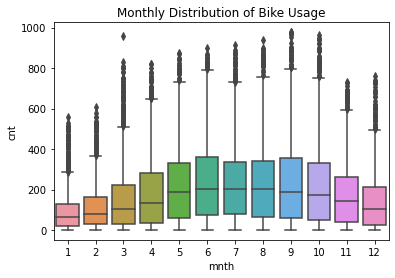

In [9]:
sns.boxplot(y=df.cnt,x=df.mnth)
plt.title("Monthly Distribution of Bike Usage")
plt.show()

From this plot, we can observe there is a significant difference of bike usage in some months.

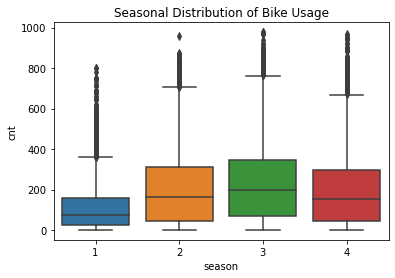

In [10]:
sns.boxplot(y=df.cnt,x=df.season)
plt.title("Seasonal Distribution of Bike Usage")
plt.show()

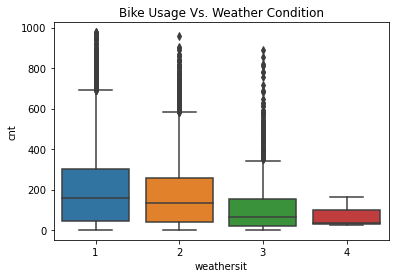

In [11]:
sns.boxplot(y=df.cnt,x=df.weathersit)
plt.title("Bike Usage Vs. Weather Condition")
plt.show()

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

This plot makes sense. Better weather = more bike usage.

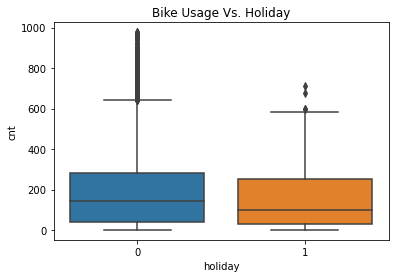

In [12]:
sns.boxplot(y=df.cnt,x=df.holiday)
plt.title("Bike Usage Vs. Holiday")
plt.show()

Before making this plot, I would think there would be usage difference if it is a holiday or not.

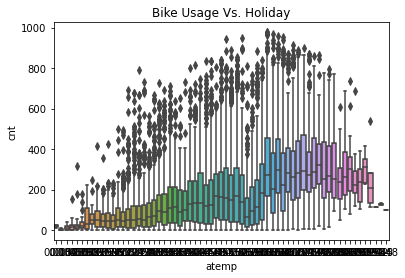

In [13]:
sns.boxplot(y=df.cnt,x=df.atemp)
plt.title("Bike Usage Vs. Holiday")
plt.show()

From this plot, we can tell there is a significant increase when temperature increase.

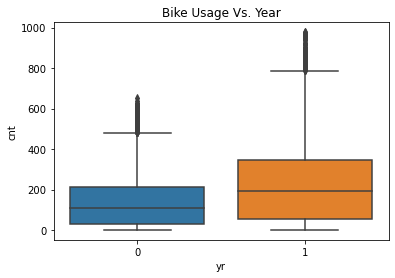

In [14]:
sns.boxplot(y=df.cnt,x=df.yr)
plt.title("Bike Usage Vs. Year")
plt.show()

## Correlation Map

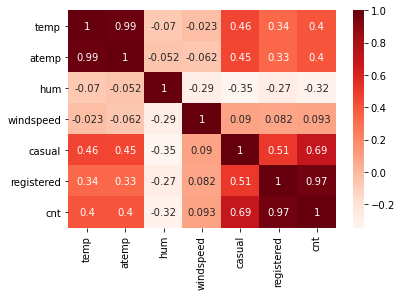

In [15]:
sns.heatmap(df.drop(["instant"],axis=1).corr(), annot=True, cmap="Reds")

## Feature Selection

In [16]:
features = df.columns
features

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Column casual and registered will be removed because cnt is the sum of these two columns. Our target is cnt.<br>
We will keep temp instead of atemp because they are the same feature in different scale <br>
We already have year column so we will remove dteday. <br>
Column windspeed shows a non significant relation with count.

In [17]:
featuresupdate = features.drop(["instant","atemp","casual","registered","dteday","windspeed"])
featuresupdate

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'cnt'],
      dtype='object')

In [18]:
X=df[featuresupdate].iloc[:,0:-1]
y=df[featuresupdate][["cnt"]]

## Encode Categorical Variable

In [19]:
X = pd.get_dummies(X,drop_first = True)

## Split Data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

## Create Linear Regression Model

In [21]:
linearModel=LinearRegression()
linearModel.fit(X=X_train,y=y_train)
prediction = linearModel.predict(X_test)
sqrt(mean_squared_error(prediction,y_test))

102.80444331528285

In [45]:
linearModel.score(X_train,y_train)

0.6847356422994926

## Numerical Data Normalization

In [24]:
sc = MinMaxScaler(feature_range=(0,1))
sc.fit(X_train.iloc[:,0:2])
X_train.iloc[:,0:2] = sc.transform(X_train.iloc[:,0:2])
X_test.iloc[:,0:2] = sc.transform(X_test.iloc[:,0:2])
X_val.iloc[:,0:2] = sc.transform(X_val.iloc[:,0:2])

In [25]:
def create_NNmodel():
    # Create Model
    model = Sequential()
    model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    # Complie model
    model.compile(loss = "mean_squared_error", optimizer = "adam", metrics=['mse'])
    return model

In [26]:
NN=create_NNmodel()

In [27]:
network = NN.fit(X_train, y_train, batch_size = 256, epochs = 200, validation_data = (X_val, y_val), verbose = 1)

Train on 10427 samples, validate on 3476 samples
Epoch 1/200
10427/10427 [==============================] - 0s 25us/step - loss: 68225.8364 - mse: 68225.8359 - val_loss: 66952.6670 - val_mse: 66952.6641
Epoch 2/200
10427/10427 [==============================] - 0s 10us/step - loss: 66125.6644 - mse: 66125.6641 - val_loss: 63097.9674 - val_mse: 63097.9648
Epoch 3/200
10427/10427 [==============================] - 0s 10us/step - loss: 59361.1308 - mse: 59361.1250 - val_loss: 52822.4343 - val_mse: 52822.4336
Epoch 4/200
10427/10427 [==============================] - 0s 11us/step - loss: 46316.9693 - mse: 46316.9727 - val_loss: 38237.4009 - val_mse: 38237.4023
Epoch 5/200
10427/10427 [==============================] - 0s 10us/step - loss: 33534.7583 - mse: 33534.7617 - val_loss: 29131.0418 - val_mse: 29131.0430
Epoch 6/200
10427/10427 [==============================] - 0s 10us/step - loss: 27837.4180 - mse: 27837.4160 - val_loss: 26275.5895 - val_mse: 26275.5898
Epoch 7/200
10427/10427 [==

10427/10427 [==============================] - 0s 11us/step - loss: 8665.9527 - mse: 8665.9521 - val_loss: 7118.8583 - val_mse: 7118.8584
Epoch 55/200
10427/10427 [==============================] - 0s 9us/step - loss: 8720.7069 - mse: 8720.7070 - val_loss: 7068.0586 - val_mse: 7068.0586
Epoch 56/200
10427/10427 [==============================] - 0s 9us/step - loss: 8732.0945 - mse: 8732.0938 - val_loss: 7038.1786 - val_mse: 7038.1782
Epoch 57/200
10427/10427 [==============================] - 0s 9us/step - loss: 8590.9940 - mse: 8590.9932 - val_loss: 6937.4565 - val_mse: 6937.4561
Epoch 58/200
10427/10427 [==============================] - 0s 9us/step - loss: 8540.1926 - mse: 8540.1934 - val_loss: 6861.3547 - val_mse: 6861.3545
Epoch 59/200
10427/10427 [==============================] - 0s 9us/step - loss: 8283.2879 - mse: 8283.2881 - val_loss: 6787.6603 - val_mse: 6787.6602
Epoch 60/200
10427/10427 [==============================] - 0s 9us/step - loss: 8432.1459 - mse: 8432.1455 - val

10427/10427 [==============================] - 0s 9us/step - loss: 5637.6821 - mse: 5637.6831 - val_loss: 3753.6664 - val_mse: 3753.6663
Epoch 109/200
10427/10427 [==============================] - 0s 9us/step - loss: 5517.3833 - mse: 5517.3823 - val_loss: 3743.9054 - val_mse: 3743.9055
Epoch 110/200
10427/10427 [==============================] - 0s 10us/step - loss: 5646.5475 - mse: 5646.5479 - val_loss: 3677.3037 - val_mse: 3677.3044
Epoch 111/200
10427/10427 [==============================] - 0s 10us/step - loss: 5631.4669 - mse: 5631.4673 - val_loss: 3661.4773 - val_mse: 3661.4773
Epoch 112/200
10427/10427 [==============================] - 0s 11us/step - loss: 5685.5053 - mse: 5685.5049 - val_loss: 3621.2773 - val_mse: 3621.2773
Epoch 113/200
10427/10427 [==============================] - 0s 9us/step - loss: 5468.4810 - mse: 5468.4800 - val_loss: 3594.3774 - val_mse: 3594.3774
Epoch 114/200
10427/10427 [==============================] - 0s 11us/step - loss: 5342.6700 - mse: 5342.6

10427/10427 [==============================] - 0s 10us/step - loss: 4643.9531 - mse: 4643.9526 - val_loss: 2811.4997 - val_mse: 2811.4995
Epoch 163/200
10427/10427 [==============================] - 0s 10us/step - loss: 4679.0449 - mse: 4679.0459 - val_loss: 2791.1262 - val_mse: 2791.1260
Epoch 164/200
10427/10427 [==============================] - 0s 10us/step - loss: 4687.6555 - mse: 4687.6553 - val_loss: 2783.8488 - val_mse: 2783.8486
Epoch 165/200
10427/10427 [==============================] - 0s 10us/step - loss: 4592.7146 - mse: 4592.7144 - val_loss: 2784.9602 - val_mse: 2784.9602
Epoch 166/200
10427/10427 [==============================] - 0s 10us/step - loss: 4613.2571 - mse: 4613.2568 - val_loss: 2826.3039 - val_mse: 2826.3037
Epoch 167/200
10427/10427 [==============================] - 0s 10us/step - loss: 4571.5183 - mse: 4571.5186 - val_loss: 2801.7415 - val_mse: 2801.7417
Epoch 168/200
10427/10427 [==============================] - 0s 9us/step - loss: 4557.9856 - mse: 4557

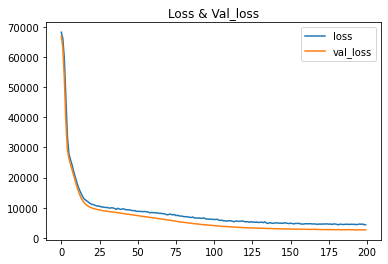

In [30]:
plt.plot(network.history["loss"], label="loss")
plt.plot(network.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss & Val_loss")
plt.show()

In [50]:
print("RMSE for Regular Neural Network is:",sqrt(NN.evaluate(X_test,y_test)[1]))

3476/3476 [==============================] - 0s 18us/step
RMSE for Regular Neural Network is: 52.13189871164535


In [53]:
NNprediction = NN.predict(X_test)
residuals = NNprediction-y_test

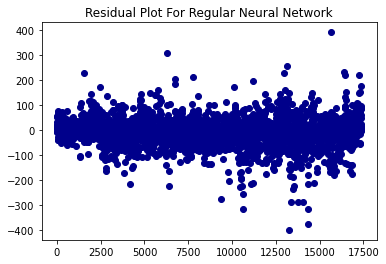

In [59]:
plt.plot(residuals,"o",color="darkblue")
plt.title("Residual Plot For Regular Neural Network")
plt.show()

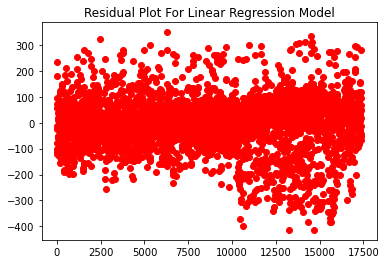

In [61]:
plt.plot(prediction-y_test,"o",color="red")
plt.title("Residual Plot For Linear Regression Model")
plt.show()